<a href="https://colab.research.google.com/github/Felipecl22/Portafolio-de-Ciencia-de-Datos/blob/nueva-rama/Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Carga de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Montando el drive para acceder a los archivos, ya que tengo los csv en mi Drive, esto no es necesario si ustedes tienen el archivo en su escritorio.

Mounted at /content/drive


In [ ]:
import pandas as pd
# Ruta del archivo CSV en Google Drive.
diabetes_csv = '/content/drive/My Drive/Colab Notebooks/Módulo 5/diabetes.csv'

# Importando la data y transformandola a objeto Dataframe.
# En este poner el path correspondiente del archivo como parametro de pd.read_csv.
df_diabetes = pd.read_csv(diabetes_csv)

# **2. EDA (Exploratory data analysis)**

In [ ]:
print(df_diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
df_diabetes.shape

(768, 9)

La data contiene 768 entradas y 9 columnas.

In [ ]:
df_diabetes.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Según los datos disponibles en la dataframe, podemos ver claramente que la única variable categórica es Outcome, la cual muestra si una persona tiene o no diabetes, 0 representa no y 1 representa si.

En cuanto a las demás variables del dataframe las tipo float representan variables continuas y las tipo int son discretas.

También podemos ver que no existen valores nulls en las columnas, pero para estar seguros vamos a realizar este análisis específicamente.

In [ ]:
df_diabetes['Outcome'].unique()

array([1, 0])

Verificamos que la columna objetivo 'Outcome' sólo contiene dos tipos de valores, 1 y 0, lo cúal nos dice que representan un variable binaria, donde 1 es SI y 0 es NO.

In [ ]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Ahora podemos estar seguros que no existen valores nulls en nuestra data que pudiesen afectar los resultados del modelo.

Vamos a checkear qué variables son categóricas y cuales son númericas.

In [ ]:
categorica = []

for columna in df_diabetes.columns:
    if df_diabetes[columna].dtype == 'O':
        categorica.append(columna)

print(f"Las columnas categóricas en el dataframe son: {len(categorica)}, estas son:\n{categorica}")

Las columnas categóricas en el dataframe son: 0, estas son:
[]


In [ ]:
numerica = []

for columna in df_diabetes.columns:
    if df_diabetes[columna].dtype != 'O':
        numerica.append(columna)

print(f"Las columnas categóricas en el dataframe son: {len(numerica)}, estas son:\n{numerica}")

Las columnas categóricas en el dataframe son: 9, estas son:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
# Antes de realizar la regresión logística necesitamos ofrecer al modelo datos correctos,
# en este caso la variable de respuesta será Outcome, y las variables explicativas serán
# todas las demás, dado esto es necesario checkear si las variables númericas están en
# la misma escala.

var_numericas = df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

# **Feature Enginering**

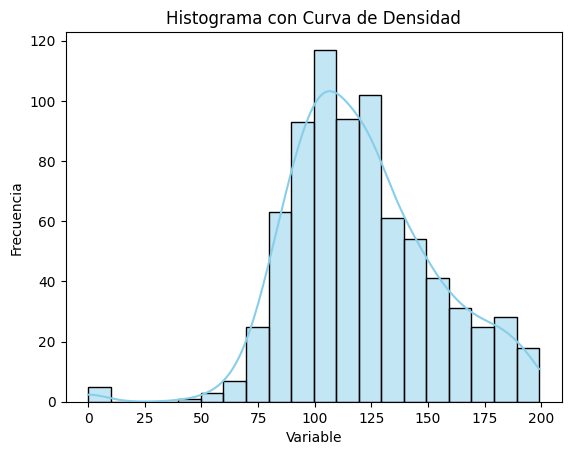

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico bill_length_mm
sns.histplot(df_diabetes['Glucose'], kde=True, color='skyblue', bins=20)  # Crear el histograma
plt.title('Histograma con Curva de Densidad')  # Agregar título al gráfico
plt.xlabel('Variable')  # Agregar etiqueta al eje x
plt.ylabel('Frecuencia')  # Agregar etiqueta al eje y
plt.show()  # Mostrar el gráfico

In [ ]:
from scipy.stats import shapiro

# Supongamos que df es tu DataFrame y 'variable' es la columna que deseas verificar
Glucose_distribution = df_diabetes['Glucose']

# Realizar la prueba de Shapiro-Wilk
estadistico, valor_p = shapiro(Glucose_distribution)

# Imprimir los resultados
print('Estadístico de prueba:', estadistico)
print('Valor p:', valor_p)

# Interpretar los resultados
if valor_p > 0.05:
    print('Los datos parecen seguir una distribución normal (no se rechaza la hipótesis nula)')
else:
    print('Los datos no siguen una distribución normal (se rechaza la hipótesis nula)')

Estadístico de prueba: 0.9701048731803894
Valor p: 1.987464880170986e-11
Los datos no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
import numpy as np

# Aplicar la transformación de la raíz cuadrada a los datos
Glucose_sqrt = np.sqrt(Glucose_distribution)

# Realizar la prueba de Shapiro-Wilk en los datos transformados
estadistico_sqrt, valor_p_sqrt = shapiro(Glucose_sqrt)

# Imprimir los resultados
print('Estadístico de prueba (después de la transformación de raíz cuadrada):', estadistico_sqrt)
print('Valor p (después de la transformación de raíz cuadrada):', valor_p_sqrt)

# Interpretar los resultados después de la transformación de raíz cuadrada
if valor_p_sqrt > 0.05:
    print('Los datos transformados con la raíz cuadrada parecen seguir una distribución normal (no se rechaza la hipótesis nula)')
else:
    print('Los datos transformados con la raíz cuadrada no siguen una distribución normal (se rechaza la hipótesis nula)')

Estadístico de prueba (después de la transformación de raíz cuadrada): 0.8769031763076782
Valor p (después de la transformación de raíz cuadrada): 3.690804863073192e-24
Los datos transformados con la raíz cuadrada no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Dado lo anterior podemos observar lo siguiente:

# Columnas X:
# La columna "Glucose" tiene un máximo de 199.
# La columna "BloodPressure" tiene un máximo de 122.
# La columna "SkinThickness" tiene un máximo de 99.
# La columna "Insulin" tiene un máximo de 846.
# La columna "BMI" tiene un máximo de 67.1.

# Nuestras variables poseen diferencias significativas en cuanto a su escala, por
# ello es necesario normalizarlas.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Aplicar la estandarización a las características seleccionadas
variables_normalizadas = scaler.fit_transform(var_numericas)

# Crear un DataFrame con las características normalizadas
df_normalizado = pd.DataFrame(variables_normalizadas, columns=var_numericas.columns)

df_normalizado.head(6)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,0.848324,0.149641,0.907270,-0.692891,0.204013
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043
4,0.504055,-1.504687,0.907270,0.765836,1.409746
5,-0.153185,0.253036,-1.288212,-0.692891,-0.811341


In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    float64
 1   BloodPressure  768 non-null    float64
 2   SkinThickness  768 non-null    float64
 3   Insulin        768 non-null    float64
 4   BMI            768 non-null    float64
dtypes: float64(5)
memory usage: 30.1 KB


In [ ]:
# Definir las variables del modelo.
X=df_normalizado
Y=df_diabetes['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

# El parámetro test_size en la función train_test_split hace referencia al tamaño del conjunto de prueba, es decir,
# la fracción de los datos que se reservarán para ser utilizados como conjunto de prueba.

Coeficientes del modelo:
Glucose: 1.3039748127469617
BloodPressure: -0.12925168998945405
SkinThickness: 0.04122696394831765
Insulin: -0.16685013174570248
BMI: 0.6123267398746485


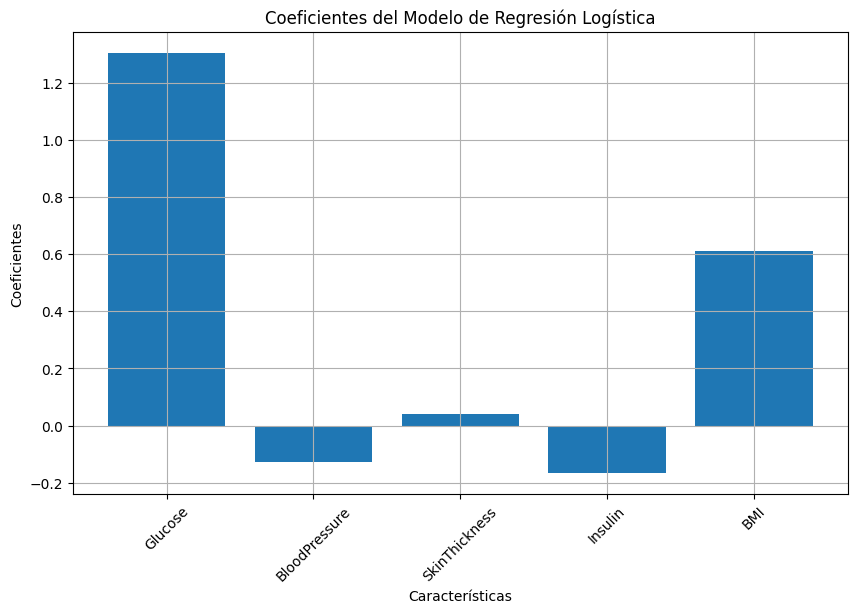

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Inicializar el modelo de regresión logística
modelo = LogisticRegression() # modelo = LogisticRegression(random_state=10, max_iter=1000) en caso de error.

# Entrenar el modelo con los conjuntos de datos de entrenamiento
modelo.fit(X_train, y_train)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]

# Imprimir los coeficientes
print("Coeficientes del modelo:")
for nombre_feature, coeficiente in zip(X.columns, coeficientes):
    print(f"{nombre_feature}: {coeficiente}")

# Trazar un gráfico de barras para visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coeficientes)
plt.xlabel('Características')
plt.ylabel('Coeficientes')
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Los coeficientes en un modelo de regresión logística representan la contribución de cada variable independiente (en este caso, Glucosa, Presión Sanguínea, Grosor de la Piel, Insulina y BMI) en el logaritmo de la razón de probabilidad (log odds) de que la variable dependiente sea igual a 1 (en tu caso, tener diabetes).

Aquí hay una forma de entender los coeficientes:

Para una variable con coeficiente positivo (como Glucosa y BMI en tu caso), un aumento en su valor aumenta el logaritmo de la razón de probabilidad de tener diabetes. Por ejemplo, si el coeficiente de Glucosa es 1.30, esto significa que un aumento de una unidad en el nivel de glucosa se asocia con un aumento de 1.30 en el logaritmo de la razón de probabilidad de tener diabetes.

Para una variable con coeficiente negativo (como Presión Sanguínea e Insulina en tu caso), un aumento en su valor disminuye el logaritmo de la razón de probabilidad de tener diabetes. Por ejemplo, si el coeficiente de Presión Sanguínea es -0.13, esto significa que un aumento de una unidad en la presión sanguínea se asocia con una disminución de 0.13 en el logaritmo de la razón de probabilidad de tener diabetes.

En resumen, los coeficientes indican cómo cada variable independiente contribuye a aumentar o disminuir la probabilidad de tener diabetes, según el modelo. Sin embargo, es importante recordar que la interpretación exacta de estos coeficientes puede variar según el contexto y el conjunto de datos específicos.

Un aumento en el nivel de glucosa está positivamente asociado con un aumento en la probabilidad de tener diabetes.
Un aumento en la presión sanguínea está negativamente asociado con la probabilidad de tener diabetes, lo que significa que a medida que la presión sanguínea aumenta, la probabilidad de tener diabetes disminuye (según tus datos y el modelo).
El grosor de la piel tiene un impacto mínimo en la probabilidad de tener diabetes según tu modelo.


Los coeficientes en un modelo de regresión logística se interpretan en términos de log odds, que representan la relación entre las variables independientes y la variable dependiente en términos de probabilidad logarítmica.

El log odds es el logaritmo natural de la razón entre la probabilidad de que un evento ocurra y la probabilidad de que no ocurra. En el contexto de la regresión logística, los coeficientes indican cuánto cambia el log odds de la variable dependiente (en este caso, la probabilidad de tener diabetes) por un cambio unitario en la variable independiente correspondiente, manteniendo todas las demás variables constantes.

Por ejemplo:

Si el coeficiente de Glucose es 1.3039748127469617, significa que un aumento de una unidad en la Glucosa aumenta el log odds de tener diabetes en aproximadamente 1.3039748127469617 unidades, manteniendo constantes todas las demás variables.
Si el coeficiente de BloodPressure es -0.12925168998945405, significa que un aumento de una unidad en la Presión Sanguínea disminuye el log odds de tener diabetes en aproximadamente 0.12925168998945405 unidades, manteniendo constantes todas las demás variables.
Y así sucesivamente para los otros coeficientes.
Dado que los log odds pueden ser difíciles de interpretar directamente, a menudo se convierten de nuevo a probabilidades utilizando la función logística (también conocida como la función sigmoide), que transforma el rango de valores de los log odds (de menos infinito a más infinito) al rango de probabilidades (de 0 a 1).

la regresión logística se utiliza para predecir la probabilidad de que un evento ocurra, en este caso, la probabilidad de que una persona tenga diabetes. La principal diferencia entre la regresión logística y la regresión múltiple es la naturaleza de la variable de respuesta.

En la regresión logística, la variable de respuesta (o la variable dependiente) es binaria, es decir, tiene dos categorías (en tu caso, diabetes o no diabetes). La regresión logística modela la probabilidad de pertenecer a una de estas dos categorías como una función de las variables independientes.

Por otro lado, la regresión múltiple se utiliza cuando la variable de respuesta es continua. En la regresión múltiple, se busca modelar la relación entre una variable dependiente continua y múltiples variables independientes. Por ejemplo, podrías usar regresión múltiple si estuvieras tratando de predecir el precio de una casa (variable continua) en función de características como el tamaño de la casa, el número de habitaciones, la ubicación, etc.

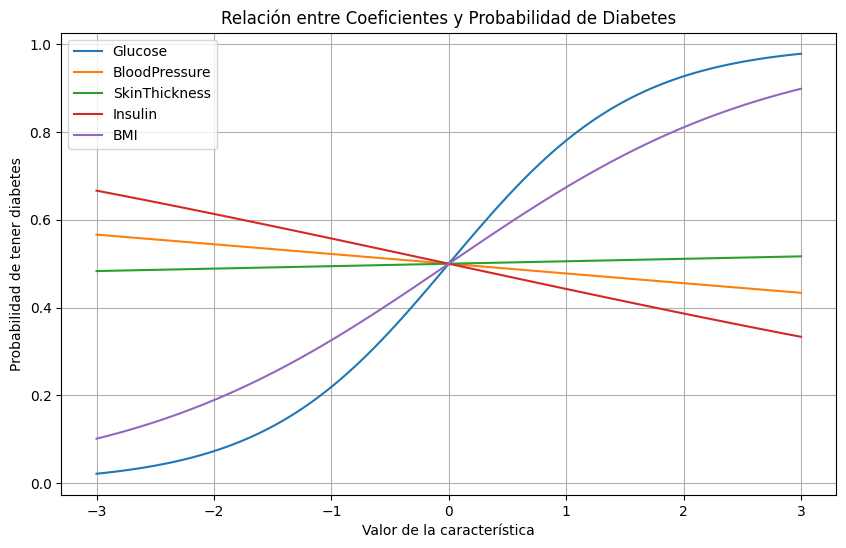

In [ ]:
import numpy as np

# Valores de los coeficientes
coeficientes = {
    'Glucose': 1.2698948321062047,
    'BloodPressure': -0.08887130449933377,
    'SkinThickness': 0.022335647999455723,
    'Insulin': -0.2308132729975625,
    'BMI': 0.7271272386875337
}

# Valores de las características para visualizar
valores_caracteristicas = np.linspace(-3, 3, 100)  # Valores para las características, ej. de -3 a 3, este rango cubre la mayoría de los valores normalizados estándar.

# Calcular la probabilidad predicha para cada valor de las características
probabilidades_predichas = []
for caracteristica, coeficiente in coeficientes.items(): # .items() se utiliza para iterar sobre cada par clave-valor en el diccionario coeficientes.
    probabilidad = 1 / (1 + np.exp(-coeficiente * valores_caracteristicas))
    probabilidades_predichas.append(probabilidad)

# Graficar la relación entre los coeficientes y la probabilidad
plt.figure(figsize=(10, 6))
for caracteristica, coeficiente in coeficientes.items():
    probabilidad = 1 / (1 + np.exp(-coeficiente * valores_caracteristicas))
    plt.plot(valores_caracteristicas, probabilidad, label=caracteristica)
plt.xlabel('Valor de la característica')
plt.ylabel('Probabilidad de tener diabetes')
plt.title('Relación entre Coeficientes y Probabilidad de Diabetes')
plt.legend()
plt.grid(True)
plt.show()

Relación no lineal con la variable de respuesta: Las variables que muestran una relación más lineal con la variable de respuesta pueden indicar que su contribución al modelo es más directa y proporcional. Por otro lado, las variables que muestran una forma más en "S" pueden tener una relación no lineal con la variable de respuesta, lo que significa que su efecto en la variable de respuesta puede cambiar dependiendo del valor de la variable.

Interacción con otras variables: La forma en "S" también puede indicar la presencia de interacciones entre variables predictoras. En un modelo de regresión logística, las interacciones pueden manifestarse como cambios en la relación entre una variable y la variable de respuesta dependiendo de los valores de otras variables.

Relación lineal: En algunos casos, una variable independiente puede tener una relación lineal con la variable dependiente. Esto significa que un cambio constante en la variable independiente resulta en un cambio constante en la probabilidad logarítmica (log odds) de la variable dependiente. Esto podría resultar en una curva recta en el gráfico de la relación entre la variable independiente y la probabilidad logarítmica.

Relación no lineal: En otros casos, la relación entre una variable independiente y la variable dependiente puede ser no lineal. Esto significa que el cambio en la probabilidad logarítmica de la variable dependiente no es constante para cada cambio unitario en la variable independiente. Esto podría resultar en curvas más complejas, como curvas en forma de S.

Interacciones entre variables: La relación entre una variable independiente y la variable dependiente también puede depender de otras variables en el modelo. En presencia de interacciones entre variables, la relación entre una variable independiente y la variable dependiente puede cambiar dependiendo de los valores de otras variables en el modelo.

Valores atípicos: La presencia de valores atípicos en los datos puede influir en la forma de la relación. Los valores atípicos pueden afectar la estimación de los coeficientes y, por lo tanto, la forma de la relación entre las variables.

Transformaciones de variables: A veces, se aplican transformaciones a las variables independientes para capturar mejor la relación con la variable dependiente. Estas transformaciones pueden cambiar la forma de la relación en el modelo.

Good to know! xdddd

Una relación negativa entre la variable independiente (Insulina) y la variable dependiente (probabilidad de tener diabetes) en un modelo de regresión logística sugiere que a medida que el nivel de insulina aumenta, la probabilidad de tener diabetes disminuye.

Esto puede tener sentido desde el punto de vista biológico. Por ejemplo, en personas sin diabetes, un aumento en los niveles de insulina en el cuerpo puede estar asociado con una respuesta normal del cuerpo para regular los niveles de glucosa en la sangre. Por lo tanto, en personas sin diabetes, niveles más altos de insulina pueden estar relacionados con una menor probabilidad de tener la enfermedad.

In [ ]:
# Hacer predicciones en el conjunto de datos de prueba
predicciones = modelo.predict(X_test)

# También puedes obtener las probabilidades de clase predichas usando predict_proba
probabilidades_predichas = modelo.predict_proba(X_test)

# predicciones contiene las etiquetas de clase predichas para cada instancia en X_test
# probabilidades_predichas contiene las probabilidades de pertenencia a cada clase para cada instancia en X_test

# Por ejemplo, si solo estás interesado en la predicción de clase
print("Predicciones de clase:", predicciones)

# Si quieres ver las probabilidades de pertenencia a cada clase
print("Probabilidades predichas:", probabilidades_predichas)


Predicciones de clase: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0]
Probabilidades predichas: [[0.84745218 0.15254782]
 [0.66822648 0.33177352]
 [0.78678431 0.21321569]
 [0.87985746 0.12014254]
 [0.59756488 0.40243512]
 [0.77561612 0.22438388]
 [0.97789381 0.02210619]
 [0.59316122 0.40683878]
 [0.42065708 0.57934292]
 [0.38991304 0.61008696]
 [0.81467838 0.18532162]
 [0.15046492 0.84953508]
 [0.57144858 0.42855142]
 [0.84279573 0.15720427]
 [0.90805301 0.09194699]
 [0.64876352 0.35123648]
 [0.84034482 0.15965518]
 [0.91347577 0.08652423]
 [0.14833583 0.85166417]
 [0.30439885 0.69560115]
 [0.84489939 0.15510061]
 [0.89713535 0.10286465]
 [0.692317

Estas son todas las instancias o mejor dichos todas las filas del grupo de prueba y muestra 2 valores, dependiendo de las predicciones de la clase, si es 0 es NO y si es 1 es SI.

las predicciones de clase y las probabilidades predichas tienen la misma longitud. Esto es porque cada instancia en tus datos de entrada (nuevos_datos) tiene una predicción asociada de la clase a la que pertenece y las probabilidades de pertenecer a cada clase.

La salida de la predicción de clase es una lista de 0s y 1s, donde 0 representa la clase negativa (no diabetes) y 1 representa la clase positiva (diabetes). Esta lista tiene la misma longitud que el número de instancias en tus datos de entrada.

Por otro lado, las probabilidades predichas son matrices donde cada fila corresponde a una instancia en tus datos de entrada, y cada columna representa la probabilidad de esa instancia de pertenecer a cada una de las clases. Por ejemplo, la primera columna representa la probabilidad de ser clasificado como la clase negativa (no diabetes) y la segunda columna representa la probabilidad de ser clasificado como la clase positiva (diabetes). Cada fila suma 1, indicando que estas probabilidades son para una instancia específica.

Para encontrar el porcentaje de confianza de las predicciones, puedes tomar las probabilidades predichas de la clase positiva (diabetes) y compararlas con un umbral. Si la probabilidad predicha de tener diabetes es mayor que el umbral, puedes considerar que la predicción es positiva (1), de lo contrario, es negativa (0). Ajustar este umbral puede ser útil dependiendo de la sensibilidad o especificidad que desees en tu modelo.

In [ ]:
# Obtén el número de instancias en X_test
num_instancias = len(X_test)

# Itera sobre cada instancia en X_test
for i in range(num_instancias):
    instancia = X_test.iloc[i]  # Obtén la instancia actual

    # Muestra las características de la instancia actual
    print(f"Instancia {i+1}:")
    print(f"Glucose: {instancia['Glucose']}")
    print(f"BloodPressure: {instancia['BloodPressure']}")
    print(f"SkinThickness: {instancia['SkinThickness']}")
    print(f"Insulin: {instancia['Insulin']}")
    print(f"BMI: {instancia['BMI']}")

    # Muestra la predicción de clase y las probabilidades predichas para esta instancia
    print(f"Predicción de Clase: {predicciones[i]}")
    print(f"Probabilidades Predichas: {probabilidades_predichas[i]}")
    print()

Instancia 1:
Glucose: -0.7165334717264664
BloodPressure: -0.5741277459136239
SkinThickness: 0.7818138030884986
Insulin: 0.9568596530309466
BMI: 0.2547804694892914
Predicción de Clase: 0
Probabilidades Predichas: [0.84745218 0.15254782]

Instancia 2:
Glucose: -0.2783734371474431
BloodPressure: 0.30473400231574344
SkinThickness: 0.7190857419965673
Insulin: -0.6928905722954675
BMI: 0.4705431865971717
Predicción de Clase: 0
Probabilidades Predichas: [0.66822648 0.33177352]

Instancia 3:
Glucose: -0.4035620184557355
BloodPressure: -0.2639412465385531
SkinThickness: -1.2882122129452358
Insulin: -0.6928905722954675
BMI: -0.1513611156549531
Predicción de Clase: 0
Probabilidades Predichas: [0.78678431 0.21321569]

Instancia 4:
Glucose: -0.4348591637828086
BloodPressure: 0.5632227517949692
SkinThickness: -1.2882122129452358
Insulin: -0.6928905722954675
BMI: -0.938260436871927
Predicción de Clase: 0
Probabilidades Predichas: [0.87985746 0.12014254]

Instancia 5:
Glucose: 0.4727580507023112
BloodP

In [ ]:
# Puede parecer contradictorio el obtener 192 instancias cuando las entradas son 768, esto pasa por que,
# durante le split el conjunto de entrenamiento contiene el 75% de los datos originales (576 instancias) y
# el conjunto de prueba contiene el 25% restante (192 instancias), lo que coincide con el número de instancias obtenidas.

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)

Matriz de Confusión:
[[103  20]
 [ 29  40]]


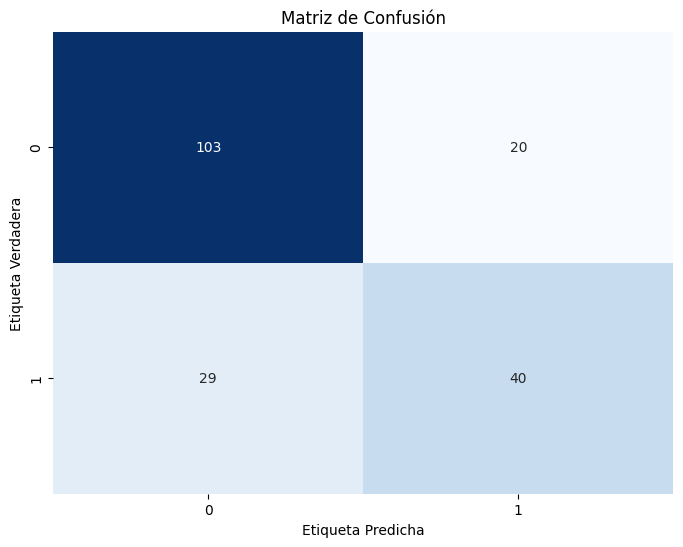

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Definir la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Se utiliza y_test en la matriz de confusión porque y_test contiene las etiquetas verdaderas de las instancias en el conjunto de datos de prueba. Al comparar estas etiquetas verdaderas con las etiquetas predichas por el modelo, podemos calcular cuántas predicciones fueron correctas y cuántas fueron incorrectas.

La matriz de confusión compara las etiquetas verdaderas con las etiquetas predichas y organiza los resultados en una tabla. Esta tabla tiene cuatro cuadrantes:

Verdaderos positivos (TP): Instancias que fueron correctamente clasificadas como positivas.

Verdaderos negativos (TN): Instancias que fueron correctamente clasificadas como negativas.

Falsos positivos (FP): Instancias que fueron incorrectamente clasificadas como positivas cuando en realidad son negativas (error tipo I).

Falsos negativos (FN): Instancias que fueron incorrectamente clasificadas como negativas cuando en realidad son positivas (error tipo II).

0: Generalmente representa la clase negativa o la ausencia de la característica que estamos tratando de predecir.

1: Representa la clase positiva o la presencia de la característica que estamos tratando de predecir.

Resumen:

1 y 1 verdadero positivo = 40

1 y 0 verdadero negativo = 20

0 y 1 falso positivo = 29

0 y 0 falso negativo = 103

Análisis confusion matrix:

Verdaderos Positivos (VP) (1 y 1):

Estos son los casos en los que el modelo predijo correctamente la clase positiva (1) cuando la verdadera clase también era positiva. En este caso, hay 40 instancias en las que el modelo predijo correctamente que una instancia pertenece a la clase positiva y en realidad lo es.

Verdaderos Negativos (VN) (1 y 0):

Estos son los casos en los que el modelo predijo correctamente la clase negativa (0) cuando la verdadera clase también era negativa. Aquí, hay 20 instancias en las que el modelo predijo correctamente que una instancia no pertenece a la clase positiva y en realidad no lo es.

Falsos Positivos (FP) (0 y 1):

Estos son los casos en los que el modelo predijo incorrectamente la clase positiva (1) cuando la verdadera clase era negativa (0). En este caso, hay 29 instancias en las que el modelo predijo que una instancia pertenece a la clase positiva, pero en realidad no lo es.

Falsos Negativos (FN) (0 y 0):

Estos son los casos en los que el modelo predijo incorrectamente la clase negativa (0) cuando la verdadera clase era positiva (1). Aquí, hay 103 instancias en las que el modelo predijo que una instancia no pertenece a la clase positiva, pero en realidad lo es.

Cuando se dice que 103 casos fueron incorrectamente identificados como negativos (no diabetes) cuando en realidad eran positivos (diabetes), se refiere a que el modelo predijo incorrectamente que esas personas no tenían diabetes cuando en realidad sí la tenían. Este tipo de error se llama un falso negativo en el contexto de una matriz de confusión.

Significa que el modelo perdió la detección de esas 103 personas que realmente tenían diabetes, lo cual podría ser preocupante en un escenario médico, ya que estas personas podrían no recibir el tratamiento adecuado oportuno.

Para abordar este problema, se podrían considerar varias acciones, como mejorar la calidad de los datos, ajustar el umbral de clasificación del modelo, probar diferentes algoritmos de clasificación o agregar más características relevantes para mejorar la precisión del modelo en la detección de casos de diabetes.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calcular precisión
precision = precision_score(y_test, predicciones)

# Calcular recall
recall = recall_score(y_test, predicciones)

# Calcular puntuación F1
f1 = f1_score(y_test, predicciones)

# Calcular exactitud
exactitud = accuracy_score(y_test, predicciones)

# Calcular área bajo la curva ROC (AUC-ROC)
auc_roc = roc_auc_score(y_test, probabilidades_predichas[:, 1])

# Imprimir las métricas
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1)
print("Exactitud:", exactitud)
print("Área bajo la curva ROC (AUC-ROC):", auc_roc)


Precisión: 0.6666666666666666
Recall: 0.5797101449275363
Puntuación F1: 0.6201550387596899
Exactitud: 0.7447916666666666
Área bajo la curva ROC (AUC-ROC): 0.7741251325556733


Precisión (Accuracy):

Esta métrica representa la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) sobre el total de predicciones realizadas por el modelo.
En tu caso, la precisión es del 66.67%, lo que significa que el 66.67% de las predicciones hechas por el modelo son correctas.
No nos da información directa sobre los casos incorrectamente identificados como negativos.
Recall (Sensibilidad):

Representa la proporción de casos positivos (en este caso, diabetes) que fueron correctamente identificados por el modelo.
En tu caso, el recall es del 57.97%, lo que significa que el modelo identificó correctamente el 57.97% de los casos de diabetes.
Esto indica que el modelo perdió la detección del 42.03% de los casos de diabetes, incluyendo los 103 casos incorrectamente identificados como negativos.
Puntuación F1:

Es una medida que combina la precisión y el recall en un solo valor, calculado como la media armónica de ambos.
En tu caso, la puntuación F1 es del 62.02%, lo que indica un balance entre la precisión y el recall del modelo.
Refleja la capacidad del modelo para identificar correctamente los casos positivos y negativos, considerando tanto los falsos positivos como los falsos negativos.
Exactitud (Accuracy):

Es similar a la precisión, representando la proporción de predicciones correctas del modelo.
En tu caso, la exactitud es del 74.48%, lo que significa que el 74.48% de las predicciones del modelo son correctas.
Al igual que la precisión, no nos proporciona información específica sobre los casos incorrectamente identificados como negativos.
Área bajo la curva ROC (AUC-ROC):

Es una medida de la capacidad del modelo para discriminar entre clases (diabetes y no diabetes).
Cuanto mayor sea el valor del AUC-ROC (más cerca de 1), mejor será la capacidad del modelo para distinguir entre las clases.
En tu caso, el AUC-ROC es del 77.41%, lo que indica una capacidad moderada del modelo para discriminar entre los casos de diabetes y no diabetes.

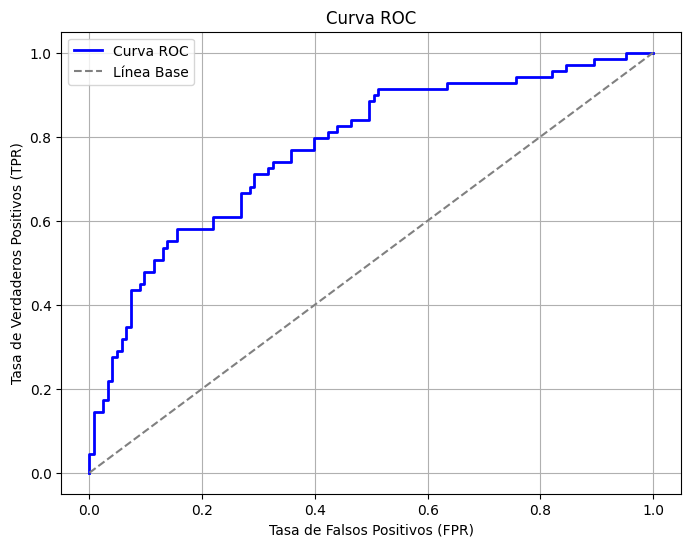

Área bajo la curva ROC (AUC): 0.7741251325556733


In [ ]:
from sklearn.metrics import roc_curve

# Obtener las tasas de falsos positivos (fpr) y verdaderos positivos (tpr)
fpr, tpr, _ = roc_curve(y_test, probabilidades_predichas[:, 1])

# Generar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Línea Base')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el área bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probabilidades_predichas[:, 1])
print("Área bajo la curva ROC (AUC):", auc)

 En el contexto de la curva ROC, una línea recta que va desde el origen (0,0) hasta el punto (1,1) representaría un clasificador aleatorio o un modelo que no tiene capacidad discriminativa, ya que estaría prediciendo las clases de manera completamente al azar.


Exactamente. En la parte inferior izquierda del gráfico, donde la curva se acerca al vértice, el modelo tiene un umbral de clasificación bajo, lo que significa que clasifica más casos como positivos, aumentando así tanto la tasa de verdaderos positivos como la tasa de falsos positivos. A medida que nos movemos hacia la parte superior derecha del gráfico, el umbral de clasificación aumenta y el modelo clasifica menos casos como positivos, lo que disminuye tanto la tasa de verdaderos positivos como la tasa de falsos positivos.

Por lo tanto, el área bajo la curva (AUC) representa la capacidad general del modelo para discriminar entre clases positivas y negativas. Si el AUC es cercano a 1, indica que el modelo tiene una buena capacidad de discriminación, es decir, puede distinguir correctamente entre las clases positivas y negativas en la mayoría de los casos. Por el contrario, si el AUC es cercano a 0.5, indica que el modelo no tiene capacidad de discriminación y clasifica las instancias al azar. En tu caso, el AUC es de aproximadamente 0.77, lo que sugiere que el modelo tiene una capacidad de discriminación moderada.

**Usar nuevos datos para determinar la probabilidad de si o no**

In [ ]:
nuevos_datos = {
    'Glucose': [150],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6]
}

nuevos_datos = pd.DataFrame(nuevos_datos)

In [ ]:
nuevos_datos

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,150,72,35,0,33.6


In [ ]:
from sklearn.preprocessing import StandardScaler

#Cuando utilizas fit_transform() en los nuevos datos, el StandardScaler calcula la media y la desviación estándar de los nuevos datos en lugar de utilizar las estadísticas
# que se aprendieron del conjunto de datos original. Esto conduce a la normalización incorrecta.

# Crear el objeto StandardScaler (no es necesario ajustarlo de nuevo)
scaler = StandardScaler()

# Ajustar el scaler con los datos originales, si no, no funciona.
scaler.fit(var_numericas)

# Aplicar la estandarización a los nuevos datos utilizando el modelo previamente ajustado
nuevos_datos_normalizados = scaler.transform(nuevos_datos)

# Crear un DataFrame con las características normalizadas para los nuevos datos
nuevo_df_normalizado = pd.DataFrame(nuevos_datos_normalizados, columns=nuevos_datos.columns)

print("Características normalizadas para los nuevos datos:")
print(nuevo_df_normalizado)

Características normalizadas para los nuevos datos:
    Glucose  BloodPressure  SkinThickness   Insulin       BMI
0  0.910918       0.149641        0.90727 -0.692891  0.204013


In [ ]:
# Hacer predicciones en los nuevos datos normalizados
predicciones_nuevos_datos = modelo.predict(nuevo_df_normalizado)

# También puedes obtener las probabilidades de clase predichas usando predict_proba
probabilidades_predichas_nuevos_datos = modelo.predict_proba(nuevo_df_normalizado)

# Mostrar las predicciones
print("Predicciones de clase para los nuevos datos:")
print(predicciones_nuevos_datos)

# Mostrar las probabilidades de clase predichas
print("Probabilidades predichas para los nuevos datos:")
print(probabilidades_predichas_nuevos_datos)


Predicciones de clase para los nuevos datos:
[1]
Probabilidades predichas para los nuevos datos:
[[0.3683764 0.6316236]]


El modelo determinó en base a los datos originales que los nuevos datos ingresados son un SI con un 63.16% de probabilidad.